Data set link: https://www.kaggle.com/competitions/quora-question-pairs/data?select=test.csv 

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df = df.sample(50000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 301065 to 98875
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

We can drop these null value records

In [6]:
df = df.dropna()
df

,id,qid1,qid2,question1,question2,is_duplicate
301065,301065,423924,423925,"How long does orange juice keep in the fridge,...",How long can I keep fresh juice in fridge?,0
401206,401206,534593,534594,What are some ways to channel my nervous energy?,How do I channelize my nervous energy?,0
202040,202040,304203,304204,Is there any law in India to secretly report c...,Why is the enforcement of the Child Labour (pr...,0
394065,394065,225047,81306,What were the effects and consequences of the ...,Who led the Agricultural Revolution? What are ...,1
88853,88853,1449,31229,What is the exact meaning of life?,What is the meaning of this life?,1
...,...,...,...,...,...,...
38542,38542,69978,69979,What happens if humans had more developed ridg...,If a human had infinite strength and folded a ...,0
77790,77790,48583,132756,What are the examples of unsaturated hydrocarbon?,What are halogenated hydrocarbons? What are so...,0
4380,4380,8657,8658,How can I join indian army special forces?,How can I get into Indian army?,0
161529,161529,251685,251686,What constitutes a sexual assault?,What constitutes sexual assault?,1


In [7]:
df.duplicated().sum()

0

In [8]:
df["is_duplicate"].value_counts()

0    31494
1    18506
Name: is_duplicate, dtype: int64

In [9]:
df["is_duplicate"].value_counts()/df["is_duplicate"].count()*100

0    62.988
1    37.012
Name: is_duplicate, dtype: float64

<Axes: >

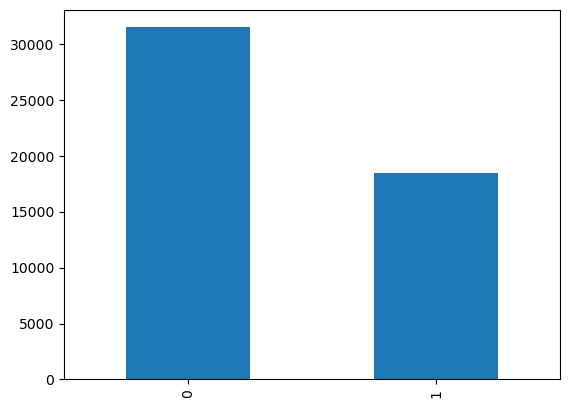

In [10]:
df["is_duplicate"].value_counts().plot(kind = "bar")

Finding number of unique questions and repeated questions

In [11]:
df

,id,qid1,qid2,question1,question2,is_duplicate
301065,301065,423924,423925,"How long does orange juice keep in the fridge,...",How long can I keep fresh juice in fridge?,0
401206,401206,534593,534594,What are some ways to channel my nervous energy?,How do I channelize my nervous energy?,0
202040,202040,304203,304204,Is there any law in India to secretly report c...,Why is the enforcement of the Child Labour (pr...,0
394065,394065,225047,81306,What were the effects and consequences of the ...,Who led the Agricultural Revolution? What are ...,1
88853,88853,1449,31229,What is the exact meaning of life?,What is the meaning of this life?,1
...,...,...,...,...,...,...
38542,38542,69978,69979,What happens if humans had more developed ridg...,If a human had infinite strength and folded a ...,0
77790,77790,48583,132756,What are the examples of unsaturated hydrocarbon?,What are halogenated hydrocarbons? What are so...,0
4380,4380,8657,8658,How can I join indian army special forces?,How can I get into Indian army?,0
161529,161529,251685,251686,What constitutes a sexual assault?,What constitutes sexual assault?,1


In [12]:
df["qid1"].value_counts()

25984     9
20628     9
14110     9
6438      8
71948     8
         ..
244308    1
166845    1
518538    1
148088    1
251685    1
Name: qid1, Length: 46009, dtype: int64

In [13]:
df["qid1"].tolist()

[423924,
 534593,
 304203,
 225047,
 1449,
 369550,
 11214,
 137328,
 9740,
 47998,
 57248,
 430184,
 5908,
 101683,
 370510,
 238442,
 443326,
 424215,
 131132,
 180892,
 347224,
 379446,
 257687,
 366905,
 427589,
 207339,
 214393,
 66206,
 263529,
 10330,
 37714,
 179020,
 13068,
 281244,
 457347,
 60137,
 17351,
 150628,
 107311,
 21290,
 498110,
 2487,
 308094,
 24530,
 41547,
 461935,
 19250,
 309770,
 221937,
 253436,
 59804,
 147232,
 481113,
 294815,
 474929,
 240242,
 133537,
 15276,
 403684,
 536886,
 1334,
 446143,
 71229,
 88991,
 356041,
 56826,
 32661,
 415300,
 270418,
 216820,
 479929,
 15231,
 11361,
 17142,
 165942,
 109429,
 94904,
 108618,
 507711,
 242480,
 451284,
 37847,
 245037,
 381756,
 98061,
 74289,
 81206,
 8314,
 196568,
 364968,
 133064,
 260158,
 56458,
 211506,
 259846,
 38520,
 102958,
 4011,
 66673,
 246661,
 186303,
 21285,
 44139,
 70412,
 31555,
 15797,
 150378,
 469600,
 425906,
 254918,
 432581,
 102244,
 531862,
 11313,
 345104,
 440944,
 27761

In [14]:
df["qid2"].tolist()

[423925,
 534594,
 304204,
 81306,
 31229,
 422041,
 11215,
 137329,
 12350,
 162427,
 20940,
 305260,
 11521,
 262706,
 80776,
 21513,
 443327,
 424216,
 131133,
 16773,
 335660,
 479387,
 257688,
 264792,
 427590,
 30782,
 214394,
 177267,
 263530,
 29357,
 37715,
 434162,
 29585,
 174881,
 396452,
 60138,
 166578,
 150629,
 513466,
 21291,
 498111,
 203697,
 333631,
 24531,
 332172,
 461936,
 15320,
 309771,
 221938,
 253437,
 59805,
 147233,
 406878,
 319983,
 348285,
 240243,
 7110,
 287820,
 403685,
 536887,
 337209,
 446144,
 292281,
 162732,
 356042,
 56827,
 119098,
 425453,
 39567,
 182699,
 190320,
 176467,
 11362,
 17143,
 165943,
 337993,
 103133,
 148493,
 507712,
 514063,
 29266,
 37848,
 154037,
 381757,
 264790,
 29393,
 71258,
 276381,
 196569,
 10041,
 133065,
 260159,
 56459,
 61280,
 138284,
 14893,
 102959,
 4012,
 179796,
 246662,
 336233,
 98929,
 44140,
 70413,
 31556,
 15798,
 150379,
 469601,
 425907,
 254919,
 432582,
 102245,
 531863,
 11314,
 103730,
 4409

In [15]:
qid = pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
qid

0        423924
1        534593
2        304203
3        225047
4          1449
          ...  
99995     69979
99996    132756
99997      8658
99998    251686
99999     13354
Length: 100000, dtype: int64

We can find out number of unique questions by making a set out of this list

In [16]:
set1 = set(qid)
len(set1)

89015

In [17]:
print("Number of unique questions", np.unique(qid).shape[0])

Number of unique questions 89015


In [18]:
x = qid.value_counts() > 1
x

2559       True
30782      True
4044       True
50535      True
2561       True
          ...  
161915    False
338331    False
277930    False
523487    False
251686    False
Length: 89015, dtype: bool

In [19]:
print("Number of question getting repeated", x[x].shape[0])

Number of question getting repeated 7299


So, out of total 8 Lakh questions only 5 Lakh are unique and around 1 lakh something questions are having duplicates 

Repeated questions histogram

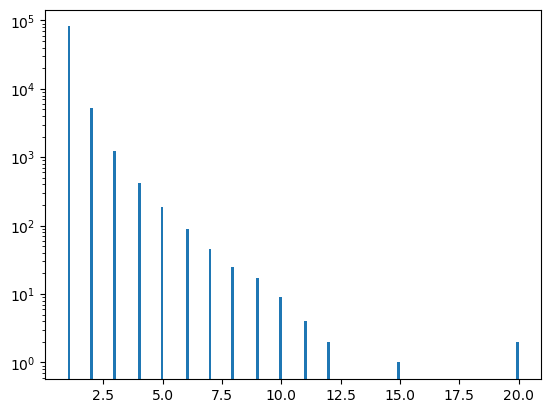

In [20]:
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale("log")
plt.show()

So, most of the questions are being repeated only once but some of the questions are being repeated close to 160 times

In [21]:
df

,id,qid1,qid2,question1,question2,is_duplicate
301065,301065,423924,423925,"How long does orange juice keep in the fridge,...",How long can I keep fresh juice in fridge?,0
401206,401206,534593,534594,What are some ways to channel my nervous energy?,How do I channelize my nervous energy?,0
202040,202040,304203,304204,Is there any law in India to secretly report c...,Why is the enforcement of the Child Labour (pr...,0
394065,394065,225047,81306,What were the effects and consequences of the ...,Who led the Agricultural Revolution? What are ...,1
88853,88853,1449,31229,What is the exact meaning of life?,What is the meaning of this life?,1
...,...,...,...,...,...,...
38542,38542,69978,69979,What happens if humans had more developed ridg...,If a human had infinite strength and folded a ...,0
77790,77790,48583,132756,What are the examples of unsaturated hydrocarbon?,What are halogenated hydrocarbons? What are so...,0
4380,4380,8657,8658,How can I join indian army special forces?,How can I get into Indian army?,0
161529,161529,251685,251686,What constitutes a sexual assault?,What constitutes sexual assault?,1


In [22]:
df = df[["question1", "question2", "is_duplicate"]]
df

,question1,question2,is_duplicate
301065,"How long does orange juice keep in the fridge,...",How long can I keep fresh juice in fridge?,0
401206,What are some ways to channel my nervous energy?,How do I channelize my nervous energy?,0
202040,Is there any law in India to secretly report c...,Why is the enforcement of the Child Labour (pr...,0
394065,What were the effects and consequences of the ...,Who led the Agricultural Revolution? What are ...,1
88853,What is the exact meaning of life?,What is the meaning of this life?,1
...,...,...,...
38542,What happens if humans had more developed ridg...,If a human had infinite strength and folded a ...,0
77790,What are the examples of unsaturated hydrocarbon?,What are halogenated hydrocarbons? What are so...,0
4380,How can I join indian army special forces?,How can I get into Indian army?,0
161529,What constitutes a sexual assault?,What constitutes sexual assault?,1


# Text Preprocessing

In [23]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [24]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [25]:
preprocess("This is a sample question@?")

'this is a sample question at'

In [26]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)
df

,question1,question2,is_duplicate
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1
88853,what is the exact meaning of life,what is the meaning of this life,1
...,...,...,...
38542,what happens if humans had more developed ridg...,if a human had infinite strength and folded a ...,0
77790,what are the examples of unsaturated hydrocarbon,what are halogenated hydrocarbons what are so...,0
4380,how can i join indian army special forces,how can i get into indian army,0
161529,what constitutes a sexual assault,what constitutes sexual assault,1


In [27]:
new_df = df
new_df

,question1,question2,is_duplicate
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1
88853,what is the exact meaning of life,what is the meaning of this life,1
...,...,...,...
38542,what happens if humans had more developed ridg...,if a human had infinite strength and folded a ...,0
77790,what are the examples of unsaturated hydrocarbon,what are halogenated hydrocarbons what are so...,0
4380,how can i join indian army special forces,how can i get into indian army,0
161529,what constitutes a sexual assault,what constitutes sexual assault,1


## Basic Feature Engineering

We can make some useful features like:

1. #char in ques1
2. #char in ques2
3. #words in ques1
4. #words in ques2
5. #words common
6. #total words in together
7. common words/total words



In [28]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()
new_df

,question1,question2,is_duplicate,q1_len,q2_len
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32
...,...,...,...,...,...
38542,what happens if humans had more developed ridg...,if a human had infinite strength and folded a ...,0,77,91
77790,what are the examples of unsaturated hydrocarbon,what are halogenated hydrocarbons what are so...,0,48,57
4380,how can i join indian army special forces,how can i get into indian army,0,41,30
161529,what constitutes a sexual assault,what constitutes sexual assault,1,33,31


In [29]:
new_df.describe()

,is_duplicate,q1_len,q2_len
count,50000.000000,50000.00000,50000.000000
mean,0.370120,58.48752,59.003520
std,0.482841,30.20300,33.648193
min,0.000000,0.00000,0.000000
25%,0.000000,38.00000,38.000000
50%,0.000000,51.00000,50.000000
75%,1.000000,71.00000,70.000000
max,1.000000,621.00000,1162.000000


In [30]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7


In [31]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [32]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9,6
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7,3
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18,5
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12,5
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7,6


In [33]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [34]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9,6,21
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7,3,16
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18,5,27
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12,5,20
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7,6,14


In [35]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9,6,21,0.29
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7,3,16,0.19
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18,5,27,0.19
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12,5,20,0.25
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7,6,14,0.43


## Advance Features

## 1. Token features

 • cwc_min: This is the ratio of the number of common words to the length of the smaller question
 
 • cwc_max: This is the ratio of the number of common words to the length of the larger question
 
 • csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
 
 • cs_max: This is the ratio of the number of common stop words to the larger stop word count among the two guestions
 
 • ctc min: This is the ratio of the number of common tokens to the smaller token count among the two questions
 
 • ct_ max: This is the ratio of the number of common tokens to the larger token count among the two questions
 
 • last_word_eq: 1 if the last word in the two questions is same, O otherwise
 
 • first_word_eq: 1 if the first word in the two questions is same, O otherwise


In [36]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    # this variable is used to just make sure denominator does not become zero
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    # Making a list having 8 zeros
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [37]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [38]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9,6,21,0.29,0.799984,0.666656,0.499988,0.399992,0.666659,0.545450,0.0,1.0
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7,3,16,0.19,0.666644,0.499988,0.249994,0.199996,0.428565,0.333330,1.0,0.0
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18,5,27,0.19,0.499992,0.374995,0.399992,0.285710,0.454541,0.312498,0.0,0.0
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12,5,20,0.25,0.749981,0.499992,0.499988,0.399992,0.499995,0.454541,0.0,0.0
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7,6,14,0.43,0.999950,0.666644,0.999975,0.799984,0.857131,0.857131,1.0,1.0


## 2. Length based features

 • mean_len: Mean of the length of the two questions (number of words)
 
 • abs_len_diff: Absolute difference between the length of the two questions (number of words)
 
 • longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

 

In [39]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs) > 0:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0001  
    return length_features
    

In [40]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [41]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9,6,21,0.29,...,0.666656,0.499988,0.399992,0.666659,0.545450,0.0,1.0,2.0,10.0,0.214286
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7,3,16,0.19,...,0.499988,0.249994,0.199996,0.428565,0.333330,1.0,0.0,2.0,8.0,0.473684
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18,5,27,0.19,...,0.374995,0.399992,0.285710,0.454541,0.312498,0.0,0.0,5.0,13.5,0.224138
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12,5,20,0.25,...,0.499992,0.499988,0.399992,0.499995,0.454541,0.0,0.0,1.0,10.5,0.411765
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7,6,14,0.43,...,0.666644,0.999975,0.799984,0.857131,0.857131,1.0,1.0,0.0,7.0,0.363636


## 3. Fuzzy Features 

Library blog: https://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/ 

 • fuzz_ratio: fuzz_ratio score from fuzzywuzzy
 
 • fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
 
 • token_sort_ratio: token_ sort_ratio from fuzzywuzzy
 
 • token_set_ratio: token_ set_ratio from fuzzywuzzy

In [42]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [43]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [44]:
new_df

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9,6,21,0.29,...,0.545450,0.0,1.0,2.0,10.0,0.214286,55,59,65,83
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7,3,16,0.19,...,0.333330,1.0,0.0,2.0,8.0,0.473684,69,81,60,74
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18,5,27,0.19,...,0.312498,0.0,0.0,5.0,13.5,0.224138,34,44,54,59
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12,5,20,0.25,...,0.454541,0.0,0.0,1.0,10.5,0.411765,49,57,73,78
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7,6,14,0.43,...,0.857131,1.0,1.0,0.0,7.0,0.363636,83,81,83,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,what happens if humans had more developed ridg...,if a human had infinite strength and folded a ...,0,77,91,13,16,4,28,0.14,...,0.249998,0.0,0.0,3.0,14.5,0.089744,13,23,49,52
77790,what are the examples of unsaturated hydrocarbon,what are halogenated hydrocarbons what are so...,0,48,57,7,9,3,14,0.21,...,0.374995,0.0,1.0,1.0,7.5,0.326531,53,58,62,67
4380,how can i join indian army special forces,how can i get into indian army,0,41,30,8,7,5,15,0.33,...,0.624992,0.0,1.0,1.0,7.5,0.387097,68,80,73,82
161529,what constitutes a sexual assault,what constitutes sexual assault,1,33,31,5,4,4,9,0.44,...,0.799984,1.0,1.0,1.0,4.5,0.531250,97,94,97,100


## EDA of Advance Features

To see if adding all these features is actually a good idea or not,

we can visually see that by using scatter plots and see if we can differentiate duplicate and non duplicate regions.

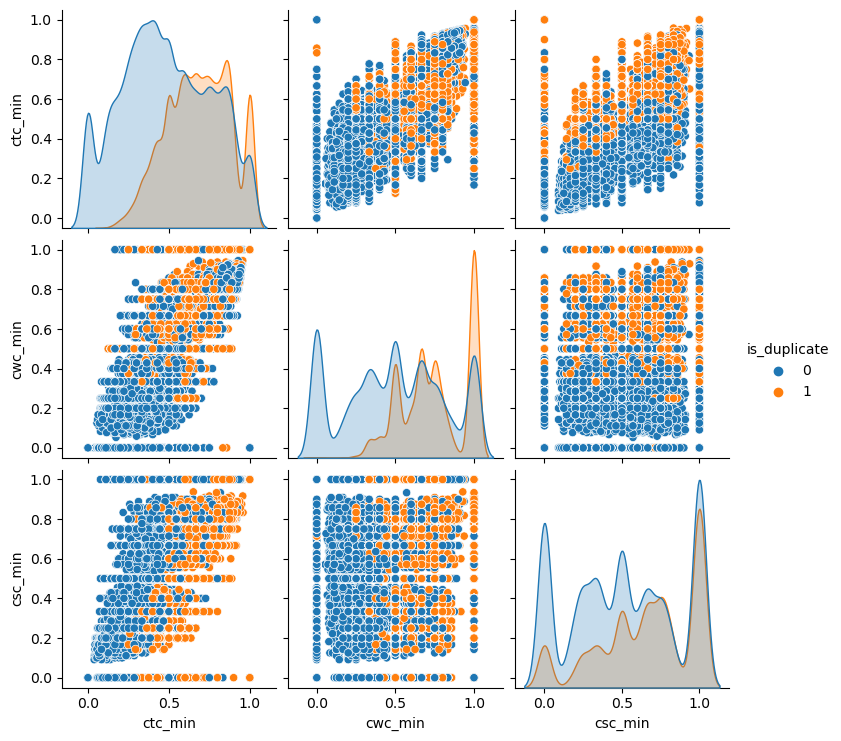

In [45]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

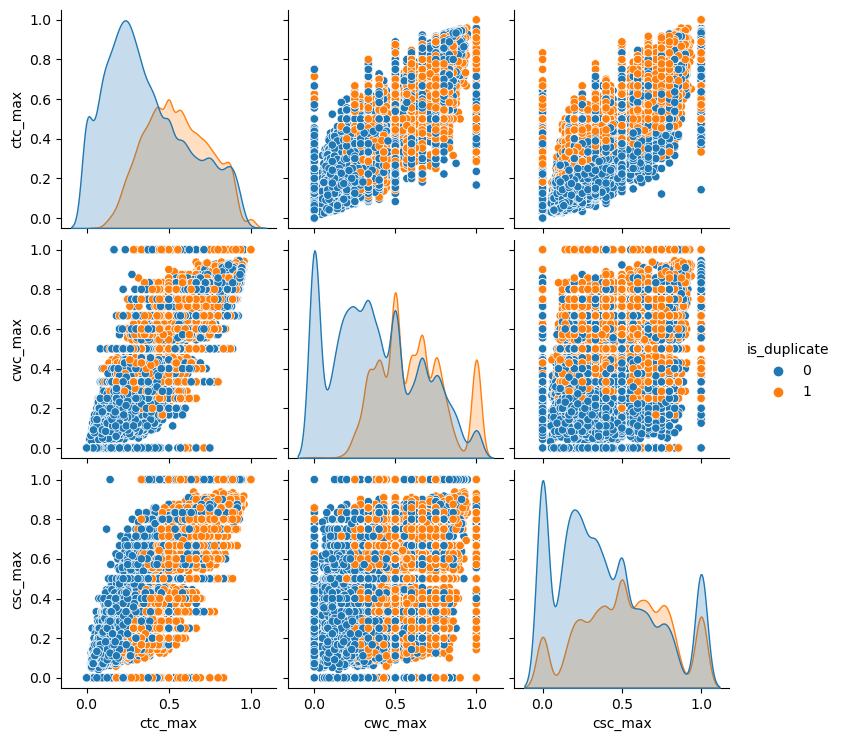

In [46]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

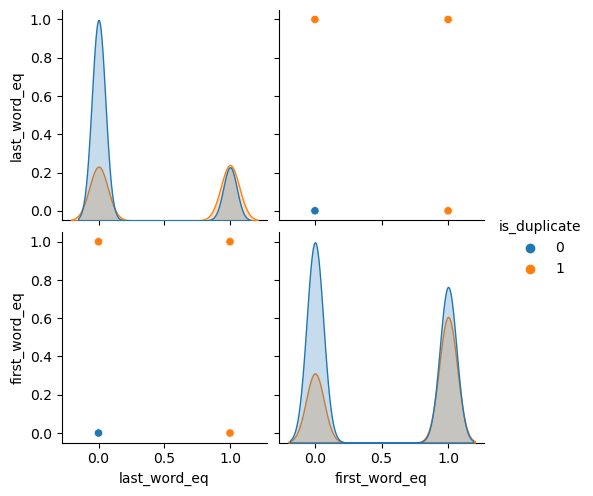

In [47]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

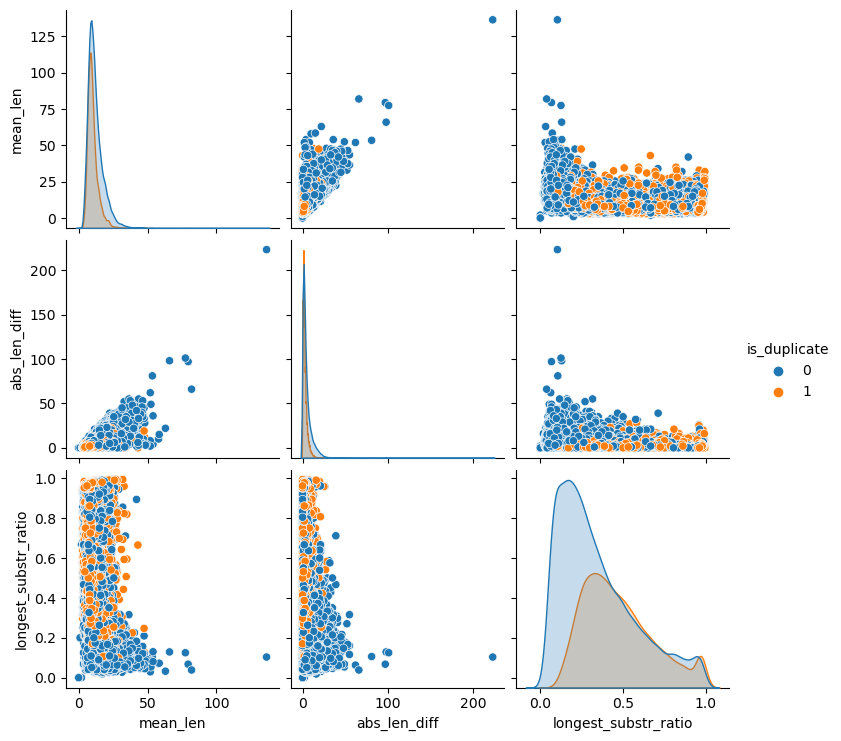

In [48]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

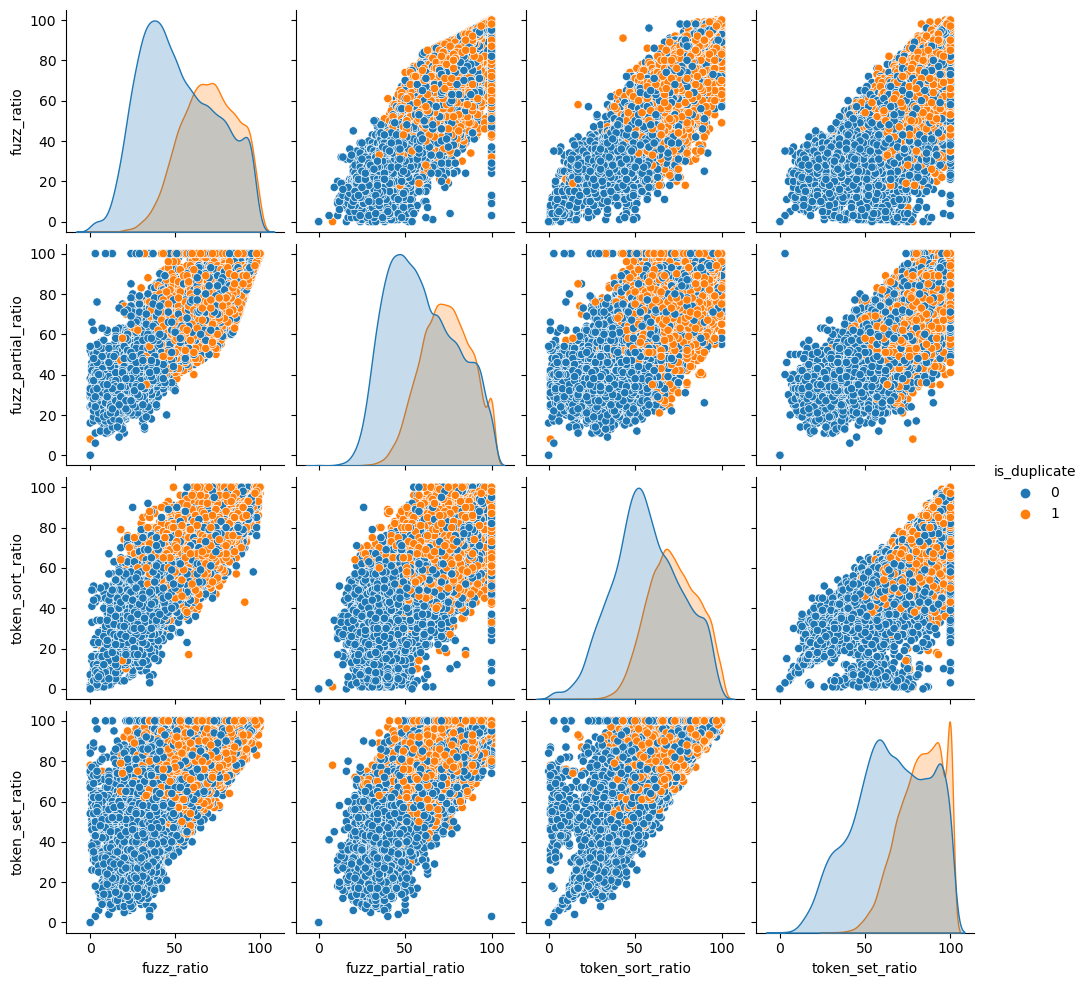

In [49]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [50]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9,6,21,0.29,...,0.545450,0.0,1.0,2.0,10.0,0.214286,55,59,65,83
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7,3,16,0.19,...,0.333330,1.0,0.0,2.0,8.0,0.473684,69,81,60,74
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18,5,27,0.19,...,0.312498,0.0,0.0,5.0,13.5,0.224138,34,44,54,59
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12,5,20,0.25,...,0.454541,0.0,0.0,1.0,10.5,0.411765,49,57,73,78
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7,6,14,0.43,...,0.857131,1.0,1.0,0.0,7.0,0.363636,83,81,83,92


## Text Vectorization and Model Building Simple Approach

Let us apply bag of words to the two input columns question1 and question2 directly without doing any text preprocessing and we will see how the accuracy score is:

Making dataframe of the two input columns

In [51]:
ques_df = new_df[["question1", "question2"]]
ques_df

,question1,question2
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...
88853,what is the exact meaning of life,what is the meaning of this life
...,...,...
38542,what happens if humans had more developed ridg...,if a human had infinite strength and folded a ...
77790,what are the examples of unsaturated hydrocarbon,what are halogenated hydrocarbons what are so...
4380,how can i join indian army special forces,how can i get into indian army
161529,what constitutes a sexual assault,what constitutes sexual assault


### Using Bag of words text vectorization technique

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
questions_list = list(ques_df["question1"]) + list(ques_df["question2"])
questions_list

['how long does orange juice keep in the fridge  once opened',
 'what are some ways to channel my nervous energy',
 'is there any law in india to secretly report child labour',
 'what were the effects and consequences of the agricultural revolution',
 'what is the exact meaning of life',
 'how does a fluorescent light work',
 'why do you not believe anything in the bible',
 'how can someone become a historic figure',
 'how do i get rid of face pimples',
 'does excessive masturbation lead to hair loss',
 'how do i stop worrying about future',
 'what is the budget breakdown of aaa games',
 'can skipping increase my height',
 'where can i get best furniture removal or storage services in central coast',
 'how much does the bachelor bachelorette get paid',
 'how do i get rid of my masturbation habits',
 'what is the cheapest way to get from new york to las vegas',
 'what are some beautiful images of death  as a concept or idea',
 'which is best institute for interior design course in indor

We will just make 3000 dimension vector to save some memory and time (basically using the most frequent 3000 words)

In [54]:
cv = CountVectorizer(max_features=3000)

In [55]:
vectors = cv.fit_transform(questions_list).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Anyway, this will also be a sparse array only

In [56]:
len(vectors)

100000

In [57]:
vectors[0].shape

(3000,)

In [58]:
q1_arr, q2_arr = np.vsplit(vectors, 2)

In [59]:
len(q1_arr)

50000

In [60]:
len(q2_arr)

50000

In [61]:
tempdf1 = pd.DataFrame(q1_arr, index = new_df.index)
tempdf1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
301065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
tempdf2 = pd.DataFrame(q2_arr, index = new_df.index)
tempdf2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
301065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
tempdf = pd.concat([tempdf1, tempdf2], axis = 1)
tempdf

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
301065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
new_df

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
301065,how long does orange juice keep in the fridge ...,how long can i keep fresh juice in fridge,0,58,41,12,9,6,21,0.29,...,0.545450,0.0,1.0,2.0,10.0,0.214286,55,59,65,83
401206,what are some ways to channel my nervous energy,how do i channelize my nervous energy,0,47,37,9,7,3,16,0.19,...,0.333330,1.0,0.0,2.0,8.0,0.473684,69,81,60,74
202040,is there any law in india to secretly report c...,why is the enforcement of the child labour pr...,0,57,92,11,18,5,27,0.19,...,0.312498,0.0,0.0,5.0,13.5,0.224138,34,44,54,59
394065,what were the effects and consequences of the ...,who led the agricultural revolution what are ...,1,69,67,10,12,5,20,0.25,...,0.454541,0.0,0.0,1.0,10.5,0.411765,49,57,73,78
88853,what is the exact meaning of life,what is the meaning of this life,1,33,32,7,7,6,14,0.43,...,0.857131,1.0,1.0,0.0,7.0,0.363636,83,81,83,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,what happens if humans had more developed ridg...,if a human had infinite strength and folded a ...,0,77,91,13,16,4,28,0.14,...,0.249998,0.0,0.0,3.0,14.5,0.089744,13,23,49,52
77790,what are the examples of unsaturated hydrocarbon,what are halogenated hydrocarbons what are so...,0,48,57,7,9,3,14,0.21,...,0.374995,0.0,1.0,1.0,7.5,0.326531,53,58,62,67
4380,how can i join indian army special forces,how can i get into indian army,0,41,30,8,7,5,15,0.33,...,0.624992,0.0,1.0,1.0,7.5,0.387097,68,80,73,82
161529,what constitutes a sexual assault,what constitutes sexual assault,1,33,31,5,4,4,9,0.44,...,0.799984,1.0,1.0,1.0,4.5,0.531250,97,94,97,100


In [65]:
final_df = new_df.iloc[:,2:]
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
301065,0,58,41,12,9,6,21,0.29,0.799984,0.666656,...,0.545450,0.0,1.0,2.0,10.0,0.214286,55,59,65,83
401206,0,47,37,9,7,3,16,0.19,0.666644,0.499988,...,0.333330,1.0,0.0,2.0,8.0,0.473684,69,81,60,74
202040,0,57,92,11,18,5,27,0.19,0.499992,0.374995,...,0.312498,0.0,0.0,5.0,13.5,0.224138,34,44,54,59
394065,1,69,67,10,12,5,20,0.25,0.749981,0.499992,...,0.454541,0.0,0.0,1.0,10.5,0.411765,49,57,73,78
88853,1,33,32,7,7,6,14,0.43,0.999950,0.666644,...,0.857131,1.0,1.0,0.0,7.0,0.363636,83,81,83,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,0,77,91,13,16,4,28,0.14,0.000000,0.000000,...,0.249998,0.0,0.0,3.0,14.5,0.089744,13,23,49,52
77790,0,48,57,7,9,3,14,0.21,0.333322,0.333322,...,0.374995,0.0,1.0,1.0,7.5,0.326531,53,58,62,67
4380,0,41,30,8,7,5,15,0.33,0.666644,0.399992,...,0.624992,0.0,1.0,1.0,7.5,0.387097,68,80,73,82
161529,1,33,31,5,4,4,9,0.44,0.999967,0.999967,...,0.799984,1.0,1.0,1.0,4.5,0.531250,97,94,97,100


In [66]:
final_df = pd.concat([final_df, tempdf], axis = 1)
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
301065,0,58,41,12,9,6,21,0.29,0.799984,0.666656,...,0,0,0,0,0,0,0,0,0,0
401206,0,47,37,9,7,3,16,0.19,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
202040,0,57,92,11,18,5,27,0.19,0.499992,0.374995,...,0,0,0,0,0,0,0,0,0,0
394065,1,69,67,10,12,5,20,0.25,0.749981,0.499992,...,0,0,0,0,0,0,0,0,0,0
88853,1,33,32,7,7,6,14,0.43,0.999950,0.666644,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,0,77,91,13,16,4,28,0.14,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
77790,0,48,57,7,9,3,14,0.21,0.333322,0.333322,...,0,0,0,0,0,0,0,0,0,0
4380,0,41,30,8,7,5,15,0.33,0.666644,0.399992,...,0,0,0,0,0,0,0,0,0,0
161529,1,33,31,5,4,4,9,0.44,0.999967,0.999967,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X = final_df.iloc[:,1:].values
X

array([[58., 41., 12., ...,  0.,  0.,  0.],
       [47., 37.,  9., ...,  0.,  0.,  0.],
       [57., 92., 11., ...,  0.,  0.,  0.],
       ...,
       [41., 30.,  8., ...,  0.,  0.,  0.],
       [33., 31.,  5., ...,  0.,  0.,  0.],
       [30., 43.,  7., ...,  0.,  0.,  0.]])

In [68]:
y = final_df.iloc[:,0].values
y

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Trying some ML models now

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

 ### 1. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7946

Accuracy has increased considerably now. Efforts paying well

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[5372,  940],
       [1114, 2574]], dtype=int64)

As it is comparatively ok not show two questions as duplicate when they are duplicate, then to show two questions as duplicate when they are not in actual, hence we need to avoid false postives.

In [74]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [75]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [76]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [77]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [78]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [79]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [86]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of India?'

In [81]:
query_point_creator(q1,q2)

array([[29., 39.,  6., ...,  0.,  0.,  0.]])

In [83]:
query_point_creator(q1,q2).shape

(1, 6022)

In [87]:
rf.predict(query_point_creator(q1,q2))

array([1], dtype=int64)

We will have to export the trainable objects like random forest model and count vectorizer cv

In [88]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))